# Classification

우리는 앞에서 기계학습의 대표적인 알고리즘의 하나인 회귀(regression)에 대해 공부하였다. 다음의 한가지 예를 우리가 배운 기계학습 알고리즘 풀어보자. 

먼저 여러분이 입학관리시스템을 reverse engineering 한다고 가정하다. 여러분에게는 세종대학교에 지원한 고등학생들이 학생부 데이터를 갖고 있으며, 학생들의 합격/ 불합격에 대한 데이터도 갖고 있다. 우리가 세종대학교의 입학관리시스템의 알고리즘을 알고 싶다고 할 때,  이 문제를 regression으로 할 수 있을까? 

안타깝게도 본 문제는 회귀로 학습이 되지 못한다. 우리가 알고 있는 regression에서 dependent variable 은 연속적인 숫자였는데, 이 데이터의 dependent variable 은 binary(True of False)이다! 그렇다면, 우리는 이제 새로운 알고리즘을 공부하여야 한다. 


## Logistic Regression Algorithm

먼저 classification에서 가장 간단하고 고전적인 로지스틱 회귀에 대해 알아보자.

앞에서 Classification은 불연속적인 dependent variable을 결정할 때 사용된다고 설명하였다. 즉dependent variable은 categorical한 값이다. (예시 1, 코끼리,고양이,말, 토끼, 강아지   예시 2 양성 종양, 음성 종양). 당분간 예시1의 multiclass classification 은 미루어두고, 먼저 예시 2의 binary classification에 집중하도록 하자. Binary classification은 dependent variable 값이 2개인 경우를 binary classification이라고 한다. (영어의 접두사 Bi...는 2를 뜻한다. Bicycle은 바퀴가 cycle이 2개이어서 Bicycle이다 ) 


자 그렇다면, 우리가 알고있는 알고리즘을 활용하여 dependent variable을 두개로 나눌 수 있을까? 
(가능하니까, 물어봤을 것이다...)

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def sigmoid(x):
    a = []
    for item in x:
               #(the sigmoid function)
        a.append(1/(1+math.exp(-item)))
    return a

sigmoid 함수는 출력값을 0과 1 사이에 mapping 시켜주는 함수이다. 이 함수만 잘 사용하면 된다! 

In [7]:
x = np.arange(-10., 10., 0.2)

x의 입력값들을 먼저 정의하고, 이 값들에 대응하는 y값을 계산하여 그래프로 그려보자.

In [8]:
y = sigmoid(x)

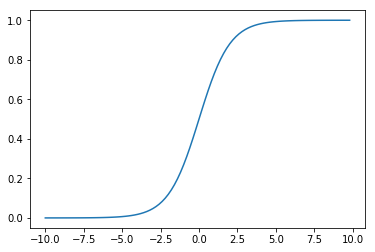

In [9]:
plt.plot(x,y)
plt.show()

## Hypothesis and Cost Function

sigmoid의 형태를 앞의 절에서 배웠다. 이제 이것을 바탕으로 hypothesis(가정)와 cost function을 정의하여, 데이터를 기반으로 학습을 하는 과정을 배우도록하자. 먼저 hypothesis와 cost function을 정의하자.

### Hypothesis

우리는 앞에서 regression을 다음과 같이 표현한다고 배웠다.

 $h_θ(x)={θ}^T{x}=θ_0+θ_1x_1+θ_2x_2+⋯+θ_Kx_K$

binary function에는 sigmoid 함수만 masking하면 된다. (간단하다)

 $h_θ(x)=\sigma ({θ}^T{x})$

여기서 sigmoid함수는 다음과 같다.

$\sigma(z) = {1\over 1+\exp(-z)}$

Hypothesis 함수는 아래와 같이 정의할 수 있으며, 함수가 의미하는 것은 다음과 같다.

$$
{  h_\sigma(x) =
  \begin{cases}
    >0.5      & \quad \text{if }\theta^Tx>0\\
    <0.5  & \quad \text{if } \theta^Tx<0
  \end{cases}
}
$$

위 식을 보면, 입력값의 가중치 합이 0보다 크면, 예측된 class 는 1이고, 0보다 작으면 그 반대이다. 즉 decision boundary (클래스를 나누는 경계)는 가중치의 합이 0일때가 된다. 

### Cost Function

선형회귀 때와 마찬가지로, 이번에도 cost function을 정의하여, 궁극적으로 cost function을 최소화 하며 가중치를 학습할 것이다. 

간단한 예로 하나의 데이터 포인트로 모델을 학습한다고 할 때 다음과 같다. 

$$
{  \text{cost} =
  \begin{cases}
    -\log(h_\theta(x))      & \quad \text{if }y=1\\
     -\log(1-h_\theta(x))   & \quad \text{if }y=0
  \end{cases}
}
$$

cost function에 대한 해석은 다음과 같다. 

먼저 binary class의 label은 숫자인 0과 1로 표기한다고 할 때, 실제 값이 1이고 모델이 0으로 예측을 하였거나, 실제 값이 0인데 모델이 1로 예측을 하였다면, 우리는 cost 함수를 penalize 할 필요가 있다. 위 함수를 보면 알 수 있듯이 -log(h(x)) 함수의 경우 h(x)가 1로 가까워 질 때, 0으로 수렴하나, h(x)가 0가 0에 가까워지면 무한대에 가까워진다. 반대로 -log(1-h(x))의 함수는 실제 값이 0이고 예측된값이 0이면 0에 수렴하고, 예측값이 1일 때 무한대로 가게 되는 것을 볼 수 있다. 즉 모델이 실제 값을 맞게 예측할 때 cost의 값은 0에 수렴한다.




위 함수를 수학식으로 1라인으로 표기한다고 한다면 어떻게 표현할 수 있을까? 

## 다른 접근 방법

다시 logistic regression 의 hypothesis 를 보도록 하자. 

$h_θ(x)=\sigma({θ}^T{x})=\sigma(θ_0+θ_1x_1+θ_2x_2+⋯+θ_Kx_K)$

그렇다면, logistic regression 모델이 주어졌을 때, 어떻게 하여 모델의 파라미터들의 fitting이 가능할까? 

본 문제를 풀기 위하여, 확률적인 가정과 수식을 이용하여 $\theta$를 구해보도록 하자.

우선 다음과 같이 가정하자

$P(y = 1 | x; θ) = h_{θ}(x)$

이라고 할 때, 반대의 개념은 다음과 같이 쉽게 구할 수 있다.

$P(y = 0 | x; θ) = 1-h_{θ}(x)$

그렇다면, 두개의 식을 하나로 합치면 다음과 같을 것이다 (지난 주와 유사)

$P(y | x; θ) = (h_θ(x))^y(1 − h_θ(x))^{(1−y)}$


그렇다면, m개의 데이터 샘플이 있다고 하면, likelihood 함수를 어떻게 작성할 수 있을까? likelihood가 무엇인지 모르는 학생들은 우도, 가능도를 찾아보세요

\begin{align} 
L(\theta)  &= p(Y | X; θ) \\
           &= \prod_i^m(y^{(i)} | x^{(i)};\theta) \\
           &= \prod_i^m (h_θ(x^{(i)}))^{y^{(i)}}(1 − h_θ(x^{(i)}))^{(1−y^{(i)})} 
\end{align}



기계 학습에서 likelihood 함수를 최대화 하는데, 보통 계산적인 편의성을 위하여, log 를 취하여 최대화 한다. log 함수는 증가이므로, log에서 최대 값이 되는 input 을 구하면, 그 input에 대응되는 값이 최대값이 된다! 

그렇다면 위의 likelihood 함수에 log를 취하여 보자.

\begin{align} 
l(\theta)  &= \log L(\theta) \\
            &=\sum_i^m  y^{(i)} \log(h_θ(x^{(i)})) +  (1-y^{(i)})\log(1 − h_θ(x^{(i)}))
\end{align}

지난주에 배웠던 위의 cost 와 비교해보자. 어떤 관계가 있는 것을 알 수 있나?
그렇다 likelihood를 maximize 하는게 곧 cost 함수를 minimize 하는 것임을 알 수 있다. (사실 likelihood에서 먼저 출발하여 이해하는 것이 더 빠르며 직관적이다)

그렇다면, 이제부터 어떻게 접근하면, 적절한 $\theta$ 를 구할 수 있을까? 

GD 를 사용함!  (강의 시간에 유도)

자 그렇다면, scikie learn에서는 어떤 식으로 제공되는지 먼저 scikit learn에서 logistic regression을 실행해보자. (과제는 당연히 직접 구현하여 풀어보는 것)

먼저 scikie learn에서 logistic regression 을 import 하자.

In [10]:
from sklearn.linear_model import LogisticRegression

pima indian diabetes 데이터를 사용하자. 

In [11]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [13]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
5,5,0,25.6,30,116,74,0.201
6,3,88,31.0,26,78,50,0.248
7,10,0,35.3,29,115,0,0.134
8,2,543,30.5,53,197,70,0.158
9,8,0,0.0,54,125,96,0.232


In [14]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

traing set 과 test set을 나누자.

In [13]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

C:\Users\cloto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
y_pred_proba

array([[0.11559877, 0.88440123],
       [0.79010942, 0.20989058],
       [0.84363562, 0.15636438],
       [0.40194611, 0.59805389],
       [0.81809255, 0.18190745],
       [0.9232763 , 0.0767237 ],
       [0.31770178, 0.68229822],
       [0.25723209, 0.74276791],
       [0.54893027, 0.45106973],
       [0.6298874 , 0.3701126 ],
       [0.45269669, 0.54730331],
       [0.10096342, 0.89903658],
       [0.68734339, 0.31265661],
       [0.74785408, 0.25214592],
       [0.82909655, 0.17090345],
       [0.79896614, 0.20103386],
       [0.21375773, 0.78624227],
       [0.93066837, 0.06933163],
       [0.63680749, 0.36319251],
       [0.68877062, 0.31122938],
       [0.44885404, 0.55114596],
       [0.60431005, 0.39568995],
       [0.65972928, 0.34027072],
       [0.90845349, 0.09154651],
       [0.89179988, 0.10820012],
       [0.63754885, 0.36245115],
       [0.90935342, 0.09064658],
       [0.16951757, 0.83048243],
       [0.8317368 , 0.1682632 ],
       [0.78762221, 0.21237779],
       [0.

In [13]:
y_test

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
417    1
577    1
172    0
352    0
27     0
605    0
239    0
744    0
79     0
496    0
      ..
97     0
530    0
327    0
619    1
518    0
632    0
524    0
536    0
597    0
462    0
17     1
739    1
263    0
241    0
344    0
302    0
704    0
240    0
170    1
691    1
490    0
45     1
750    1
62     0
78     1
366    1
301    1
382    0
140    0
463    0
Name: label, Length: 192, dtype: int64

In [20]:
y_test = np.array(y_test)
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [23]:
temp = y_test - y_pred

In [25]:
temp = np.absolute(temp)

In [26]:
temp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [29]:
np.where(temp == 1)

(array([ 21,  27,  36,  39,  47,  48,  49,  57,  58,  59,  71,  73,  77,
         86,  94,  96,  99, 104, 105, 111, 113, 117, 127, 135, 137, 141,
        144, 149, 156, 164, 165, 172, 173, 180, 184, 187, 188], dtype=int64),)

In [35]:
temp.sum() #틀린 개수 찾기

37

In [36]:
37/192*100

19.270833333333336

confusion matrix 란? 

0 인데 1로 예측, 0인데 0으로 예측, 1인데 1로 예측, 1인데 0으로 예측한 것에 가중치를 준다

## 모델 평가

In [ ]:
from sklearn import matrics
